### Лабораторна робота №2: Групи та підгрупи

**Мета роботи:** Попрацювати з деякими групами та підгрупами в Sage, познайомитися з графами Келі груп

---
### 1. Приклади груп

Для кожної з груп $G$= $S_3$, $D_4$, $\mathbb{Z}_{14}$, $\mathbb{Z}_{14}^{*}$ виконайте наступні кроки:
1. Створіть групу.
2. Знайдіть порядок групи.     # G.order()
3. Побудуйте таблицю Келі групи.    # G.cayley_table(names='elements')
4. Виберіть довільні два елементи в групі.
5. Виконайте групову операцію над обраними елементами.
6. Знайдіть обернені для обраних елементів.
7. Визначте, чи є група абелевою. Якщо ні, то знайдіть два елементи групи, які не комутують.   # G.is_abelian()

In [268]:
G1 = SymmetricGroup(3)
G2 = DihedralGroup(4)
G3 = AbelianGroup([14])
G4 = IntegerModRing(14).unit_group()

In [269]:
for i,G in enumerate((G1,G2,G3,G4)):
    print(f"order of G{i+1} = {G.order()}")

order of G1 = 6
order of G2 = 8
order of G3 = 14
order of G4 = 6


In [270]:
print(f"cayley table of G1:\n {G1.cayley_table(names='elements')}")
print(f"cayley table of G2:\n {G2.cayley_table(names='elements')}")
print(f"cayley table of G3:\n {G3.cayley_table(names=[str(x) for x in range(14)])}")
print(f"cayley table of G4:\n {G4.cayley_table(names=[str(Zmod(14)(x)) for x in list(G4)])}")


cayley table of G1:
       *       ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
       +------------------------------------------------
     ()|      ()   (2,3)   (1,2) (1,2,3) (1,3,2)   (1,3)
  (2,3)|   (2,3)      () (1,2,3)   (1,2)   (1,3) (1,3,2)
  (1,2)|   (1,2) (1,3,2)      ()   (1,3)   (2,3) (1,2,3)
(1,2,3)| (1,2,3)   (1,3)   (2,3) (1,3,2)      ()   (1,2)
(1,3,2)| (1,3,2)   (1,2)   (1,3)      () (1,2,3)   (2,3)
  (1,3)|   (1,3) (1,2,3) (1,3,2)   (2,3)   (1,2)      ()

cayley table of G2:
          *          ()      (2,4) (1,2)(3,4)  (1,2,3,4)      (1,3) (1,3)(2,4)  (1,4,3,2) (1,4)(2,3)
          +----------------------------------------------------------------------------------------
        ()|         ()      (2,4) (1,2)(3,4)  (1,2,3,4)      (1,3) (1,3)(2,4)  (1,4,3,2) (1,4)(2,3)
     (2,4)|      (2,4)         ()  (1,2,3,4) (1,2)(3,4) (1,3)(2,4)      (1,3) (1,4)(2,3)  (1,4,3,2)
(1,2)(3,4)| (1,2)(3,4)  (1,4,3,2)         ()      (1,3)  (1,2,3,4) (1,4)(2,3)      (2,4) (1,3)(2,4)
 

In [271]:
#G1
print(G1)
G = G1
a = list(G)[1]
b = list(G)[4]
print(f"{a} * {b} = {a*b}")
print(f"inverse of {a} = {a.inverse()}")
print(f"inverse of {b} = {b.inverse()}")
print(G.is_abelian())
if(not G.is_abelian()):
    els = list(G)
    n = len(els)
    br = false
    for i in range(n):
        el1 = els[i]
        for j in range(n):
            el2 = els[j]
            if el1 * el2 != el2 * el1:
                print(f"{el1} * {el2} = {el1*el2} =/= {el2*el1} = {el2} * {el1}")
                br = true
                break
        if br: break


Symmetric group of order 3! as a permutation group
(1,3,2) * (1,3) = (2,3)
inverse of (1,3,2) = (1,2,3)
inverse of (1,3) = (1,3)
False
(1,3,2) * (2,3) = (1,2) =/= (1,3) = (2,3) * (1,3,2)


In [272]:
#G2
print(G2)
G = G2
a = list(G)[1]
b = list(G)[4]
print(f"{a} * {b} = {a*b}")
print(f"inverse of {a} = {a.inverse()}")
print(f"inverse of {b} = {b.inverse()}")
print(G.is_abelian())
if(not G.is_abelian()):
    els = list(G)
    n = len(els)
    br = false
    for i in range(n):
        el1 = els[i]
        for j in range(n):
            el2 = els[j]
            if el1 * el2 != el2 * el1:
                print(f"{el1} * {el2} = {el1*el2} =/= {el2*el1} = {el2} * {el1}")
                br = true
                break
        if br: break


Dihedral group of order 8 as a permutation group
(1,3)(2,4) * (2,4) = (1,3)
inverse of (1,3)(2,4) = (1,3)(2,4)
inverse of (2,4) = (2,4)
False
(1,4,3,2) * (2,4) = (1,2)(3,4) =/= (1,4)(2,3) = (2,4) * (1,4,3,2)


In [273]:
#G3
print("Z_14")
print(G3)
G = G3
g = G.gens()[0]            

to_num = {g^i: i for i in range(14)}

a = list(G)[1]
b = list(G)[4]
print(f"{to_num[a]} * {to_num[b]} = {to_num[a*b]}")
print(f"inverse of {to_num[a]} = {to_num[a.inverse()]}")
print(f"inverse of {to_num[b]} = {to_num[b.inverse()]}")
print(G.is_abelian())
if(not G.is_abelian()):
    els = list(G)
    n = len(els)
    br = false
    for i in range(n):
        el1 = els[i]
        for j in range(n):
            el2 = els[j]
            if el1 * el2 != el2 * el1:
                print(f"{to_num[el1]} * {to_num[el2]} = {to_num[el1*el2]} =/= {to_num[el2*el1]} = {to_num[el2]} * {to_num[el1]}")
                br = true
                break
        if br: break


Z_14
Multiplicative Abelian group isomorphic to C14
1 * 4 = 5
inverse of 1 = 13
inverse of 4 = 10
True


In [274]:
#G4
print(G4)
G = G4

num_els = Zmod(14)
#Zmod(14)(element) will return number which represents the element in Z14* (and has the same order)


a = list(G)[1]
b = list(G)[4]


print(f"{num_els(a)} * {num_els(b)} = {num_els(a*b)}")
print(f"inverse of {num_els(a)} = {num_els(a.inverse())}")
print(f"inverse of {num_els(b)} = {num_els(b.inverse())}")
print(G.is_abelian())
if(not G.is_abelian()):
    els = list(G)
    n = len(els)
    br = false
    for i in range(n):
        el1 = els[i]
        for j in range(n):
            el2 = els[j]
            if el1 * el2 != el2 * el1:
                print(f"{num_els(el1)} * {num_els(el2)} = {num_els(el1*el2)} =/= {num_els(el2*el1)} = {num_els(el2)} * {num_els(el1)}")
                br = true
                break
        if br: break


Multiplicative Abelian group isomorphic to C6
3 * 11 = 5
inverse of 3 = 5
inverse of 11 = 9
True


---
### 2. Ізоморфні групи

1. Створіть групи $D_3$, $S_3$, $\mathbb{Z}_7^{*}$, $SL_2(\mathbb{Z}_2)$, $D_{12}$, $A_4$, $SL_2(\mathbb{Z}_3)$.
2. Перевірте, які з них ізоморфні.   % G.is_isomorphic(H)

In [275]:
G1 = ["D3", DihedralGroup(3)]
G2 = ["S3", SymmetricGroup(3)]
G3 = ["Z_7*", Zmod(7).unit_group()]
G4 = ["SL2(Z2)", SL(2, GF(2))]
G5 = ["D12", DihedralGroup(12)]
G6 = ["A4", AlternatingGroup(4)]
G7 = ["SL2(Z3)", SL(2, GF(3))]
groups = [G1,G2,G3,G4,G5,G6,G7]
N = 7
table = [["" for i in range(N+1)] for j in range(N+1)]
for i in range(N):
    table[0][i+1] = groups[i][0]
    table[i+1][0] = groups[i][0]
for i in range(N):
    table[i+1][i+1] = "+" 
    for j in range(N):
        if i == j: continue
        g1 = groups[i]
        g2 = groups[j]
        try:
            iso = g1[1].is_isomorphic(g2[1])
        except:
            try:
                iso = g2[1].is_isomorphic(g1[1])
            except:
                continue
        table[i+1][j+1] = "+" if iso else "-"
for row in table:
    print("\t".join(row))
       

	D3	S3	Z_7*	SL2(Z2)	D12	A4	SL2(Z3)
D3	+	+	-	+	-	-	-
S3	+	+	-	+	-	-	-
Z_7*	-	-	+	-	-	-	-
SL2(Z2)	+	+	-	+	-	-	-
D12	-	-	-	-	+	-	-
A4	-	-	-	-	-	+	-
SL2(Z3)	-	-	-	-	-	-	+


---
### 3. Підгрупи і гратка підгруп

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:
1. Створіть групу.
2. Знайдіть усі її підгрупи.   % G.subgroups()
3. Побудуйте гратку підгруп.  
4. Вкажіть групу, яка сама не абелева, але всі її власні підгрупи є абелевими.

In [276]:
# Groups
G1 = AbelianGroup([24])
G2 = QuaternionGroup()
G3 = DihedralGroup(5)
G4 = SymmetricGroup(4)

# Subgroups
for G in [G1, G2, G3, G4]:
    print(f"\nGroup: {G}")
    subs = G.subgroups()
    print("Subgroups (orders):", [H.order() for H in subs])


Group: Multiplicative Abelian group isomorphic to C24
Subgroups (orders): [24, 12, 8, 6, 4, 3, 2, 1]

Group: Quaternion group of order 8 as a permutation group
Subgroups (orders): [1, 2, 4, 4, 4, 8]

Group: Dihedral group of order 10 as a permutation group
Subgroups (orders): [1, 2, 2, 2, 2, 2, 5, 10]

Group: Symmetric group of order 4! as a permutation group
Subgroups (orders): [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 12, 24]


Multiplicative Abelian group isomorphic to C24
Subgroups:

[1]
Multiplicative Abelian subgroup isomorphic to C3 x C8 generated by {f}
 abelian
[2]
Multiplicative Abelian subgroup isomorphic to C3 x C4 generated by {f^2}
 abelian
[3]
Multiplicative Abelian subgroup isomorphic to C8 generated by {f^3}
 abelian
[4]
Multiplicative Abelian subgroup isomorphic to C2 x C3 generated by {f^4}
 abelian
[6]
Multiplicative Abelian subgroup isomorphic to C4 generated by {f^6}
 abelian
[8]
Multiplicative Abelian subgroup isomorphic to C3 generated by {f^8}
 abelian
[12]
Multiplicative Abelian subgroup isomorphic to C2 generated by {f^12}
 abelian
[]
Trivial Abelian subgroup
 abelian


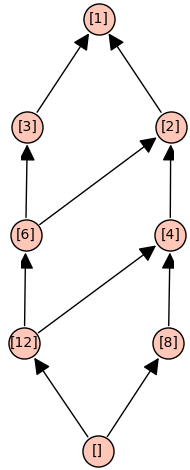

In [277]:
G1 = AbelianGroup([24])
print(G1)
S = G1.subgroups()
n = len(S)
print("Subgroups:\n")
g = G1.gens()[0]   
to_num = {g^i: i for i in range(14)}
for H in S:
    print([to_num[i] for i in H.gens()])  
    print(H)
    print(f"{"" if H.is_abelian() else " not"} abelian")

labels = {i: str([to_num[i] for i in S[i].gens()]) for i in range(n)}
P = Poset((range(n), lambda i, j: S[i].is_subgroup(S[j])))

P.plot(element_labels=labels, vertex_size=500)

Quaternion group of order 8 as a permutation group
Subgroups:

1
Subgroup generated by [()] of (Quaternion group of order 8 as a permutation group)
 abelian
-1
Subgroup generated by [(1,3)(2,4)(5,7)(6,8)] of (Quaternion group of order 8 as a permutation group)
 abelian
j
Subgroup generated by [(1,3)(2,4)(5,7)(6,8), (1,5,3,7)(2,8,4,6)] of (Quaternion group of order 8 as a permutation group)
 abelian
i
Subgroup generated by [(1,3)(2,4)(5,7)(6,8), (1,2,3,4)(5,6,7,8)] of (Quaternion group of order 8 as a permutation group)
 abelian
-k
Subgroup generated by [(1,3)(2,4)(5,7)(6,8), (1,6,3,8)(2,5,4,7)] of (Quaternion group of order 8 as a permutation group)
 abelian
i j
Subgroup generated by [(1,3)(2,4)(5,7)(6,8), (1,5,3,7)(2,8,4,6), (1,2,3,4)(5,6,7,8)] of (Quaternion group of order 8 as a permutation group)
 not abelian


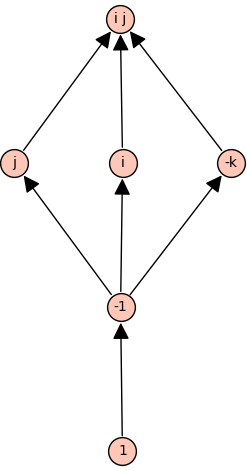

In [278]:
G2 = QuaternionGroup()
print(G2)
S = G2.subgroups()
n = len(S)

# Generators
i = G2.gens()[0]
j = G2.gens()[1]
k = i * j
minus_k = j*i
# Other elements
one = G2.one()
minus_one = i**2
minus_i = k*j
minus_j = i*k


# Mapping dictionary
quaternion_map = {
    one: '1',
    minus_one: '-1',
    i: 'i',
    minus_i: '-i',
    j: 'j',
    minus_j: '-j',
    k: 'k',
    minus_k: '-k'
}



labels = {i: " ".join([quaternion_map[gen] for gen in S[i].minimal_generating_set()]) for i in range(1,n)}
labels.update({0 : '1'})
P = Poset((range(n), lambda i, j: S[i].is_subgroup(S[j])))

print("Subgroups:\n")
for _,H in enumerate(S):
    print(labels[_])
    print(H)
    print(f"{"" if H.is_abelian() else " not"} abelian")

P.plot(element_labels=labels, vertex_size=400)

Dihedral group of order 10 as a permutation group
Subgroups:

Subgroup generated by [()] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(2,5)(3,4)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,2)(3,5)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,3)(4,5)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,4)(2,3)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,5)(2,4)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,2,3,4,5)] of (Dihedral group of order 10 as a permutation group)
 abelian
Subgroup generated by [(1,2,3,4,5), (2,5)(3,4)] of (Dihedral group of order 10 as a permutation group)
 not abelian


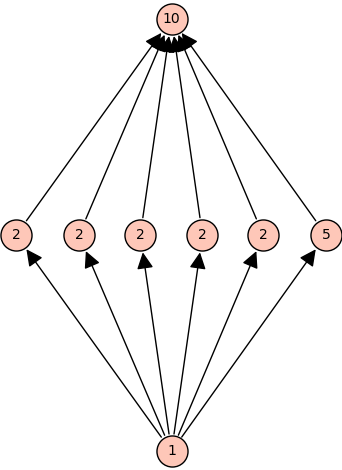

In [279]:
G3 = DihedralGroup(5)
print(G3)
S = G3.subgroups()
n = len(S)
print("Subgroups:\n")
for H in S:
    print(H)
    print(f"{"" if H.is_abelian() else " not"} abelian")

labels = {i: str(S[i].order()) for i in range(n)}
P = Poset((range(n), lambda i, j: S[i].is_subgroup(S[j])))

P.plot(element_labels=labels, vertex_size=500)

Symmetric group of order 4! as a permutation group
Subgroups:

Subgroup generated by [()] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,2)(3,4)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,3)(2,4)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,4)(2,3)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(3,4)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(2,3)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(2,4)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,2)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,3)] of (Symmetric group of order 4! as a permutation group)
 abelian
Subgroup generated by [(1,4)] of (Symmetric group of order 4! as a per

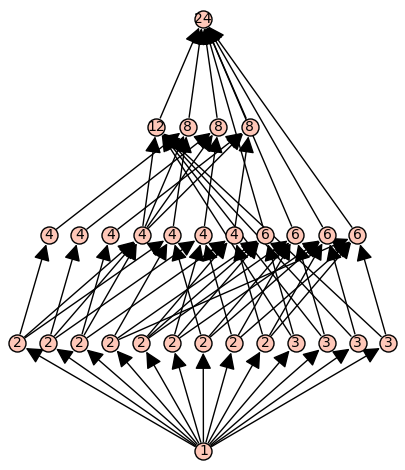

In [280]:
G4 = SymmetricGroup(4)
print(G4)
S = G4.subgroups()
n = len(S)
print("Subgroups:\n")
for H in S:
    print(H)
    print(f"{"" if H.is_abelian() else " not"} abelian")

labels = {i: str(S[i].order()) for i in range(n)}
P = Poset((range(n), lambda i, j: S[i].is_subgroup(S[j])))

P.plot(element_labels=labels, vertex_size=150)

In [281]:
print("D5 - not abelian\n subgroups - abelian")
print("Q8 - not abelian\n subgroups - abelian")

D5 - not abelian
 subgroups - abelian
Q8 - not abelian
 subgroups - abelian


---
### 4. Системи твірних

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:

1. Створіть групу.
2. Знайдіть деяку систему твірних групи.    % G.gens()
3. Знайдіть всі мінімальні системи твірних групи.    % G.minimal_generating_sets()
4. Візьміть довільні два елементи групи, породіть ними підгрупу, знайдіть її порядок.  % G.subgroup([el1, el2])

In [282]:
G1 = AbelianGroup([24])
print(G1)
gens = G1.gens()
print(gens)
g = gens[0]
to_num = {g^i: i for i in range(24)}
print([to_num[gen] for gen in gens])



H = G1.subgroup([g^2, g^4])
H

Multiplicative Abelian group isomorphic to C24
(f,)
[1]


Multiplicative Abelian subgroup isomorphic to C3 x C4 generated by {f^2, f^4}

In [283]:
G2 = QuaternionGroup()
print(G2)
print(G2.gens())
print(G2.minimal_generating_set())
print(G2.subgroup([list(G2)[3],list(G2)[5]]))


Quaternion group of order 8 as a permutation group
((1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6))
[(1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6)]
Subgroup generated by [(1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6)] of (Quaternion group of order 8 as a permutation group)


In [284]:
G3 = DihedralGroup(5)
print(G3)
print(G3.gens())
print(G3.minimal_generating_set())
G3.subgroup([list(G3)[2], list(G3)[5]])

Dihedral group of order 10 as a permutation group
((1,2,3,4,5), (1,5)(2,4))
[(2,5)(3,4), (1,2,3,4,5)]


Subgroup generated by [(1,4,2,5,3), (2,5)(3,4)] of (Dihedral group of order 10 as a permutation group)

In [285]:
G4 = SymmetricGroup(4)
print(G4)
print(G4.gens())
print(G4.minimal_generating_set())
G4.subgroup([list(G4)[2], list(G4)[5]])

Symmetric group of order 4! as a permutation group
((1,2,3,4), (1,2))
[(2,4,3), (1,4,2,3)]


Subgroup generated by [(1,4)(2,3), (1,3,2)] of (Symmetric group of order 4! as a permutation group)

---
### 5. Графи Келі

Графом Келі групи $G$ відносно системи твірних $S$ називається орієнтований граф $\Gamma(G,S)$, вершинами якого є елементи групи і кожний $g\in G$ з'єднаний орієнтованим ребро з $gs$ для всіх $s\in S$.

1. Побудуйте графи Келі для груп $D_4$, $Q_8$, $S_3$, $S_4$, $A_4$ для деяких систем твірних.  % G.cayley_graph()
2. Опишіть спостереження: які особливості бачите у графів Келі груп?

In [286]:
def plot_cayley_graph(G, gens, name):
    print(f"\nG = {name}")
    print(f"Generators: {gens}")
    cayley = G.cayley_graph(generators=gens)
    cayley.plot(vertex_labels=True, edge_labels=False, vertex_size=1000, figsize=10).show()


G = D_4
Generators: [(1,2,3,4), (1,4)(2,3)]


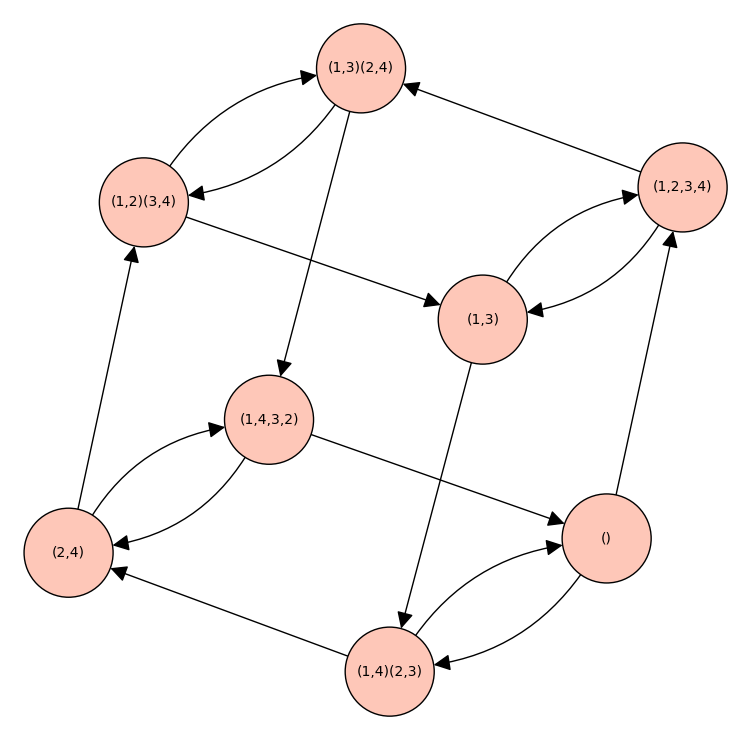

In [287]:
G1 = DihedralGroup(4)
gens_1 = [gen for gen in G1.gens()]  # Rotation (order 4), reflection (order 2)
plot_cayley_graph(G1, gens_1, "D_4")


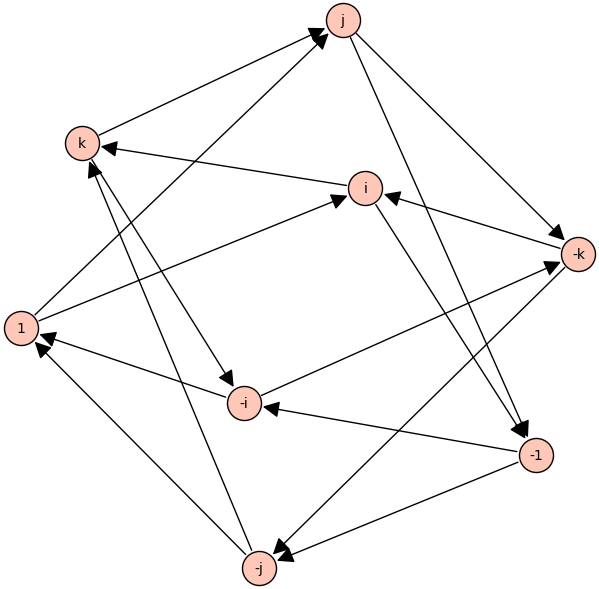

In [288]:

G2 = QuaternionGroup()

i = G2.gen(0)
j = G2.gen(1)
k = i * j
minus_k = j * i

# Other elements
one = G2.one()
minus_one = i**2
minus_i = k * j
minus_j = i * k

quaternion_map = {
    one: '1',
    minus_one: '-1',
    i: 'i',
    minus_i: '-i',
    j: 'j',
    minus_j: '-j',
    k: 'k',
    minus_k: '-k'
}

gens_2 = [i, j]

cayley = G2.cayley_graph(generators=gens_2)
vertex_labels = {elem: quaternion_map.get(elem, str(elem)) for elem in G2}

cayley.plot(
    vertex_labels=vertex_labels,
    vertex_size=600,
    edge_labels=False,
    figsize=8,
    fontsize=10
).show()




G = S_3
Generators: [(1,2,3), (1,2)]


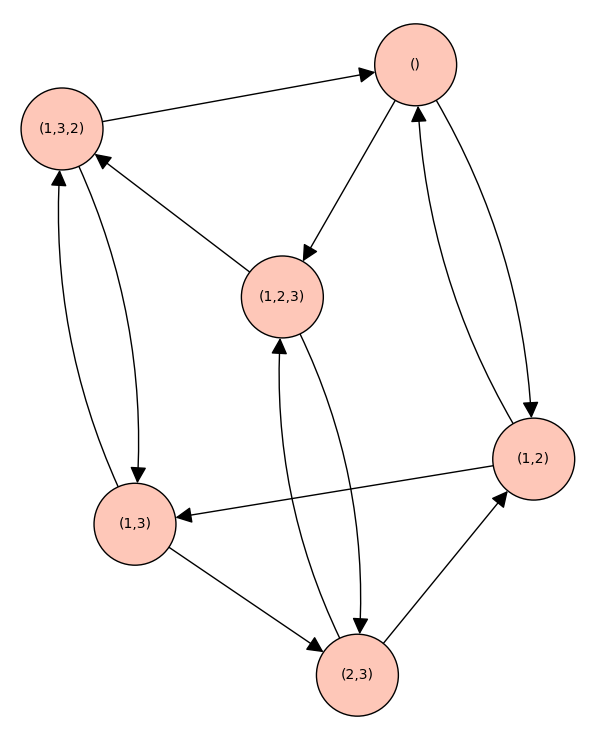

In [289]:

G3 = SymmetricGroup(3)
gens_3 = [gen for gen in G3.gens()]  # Transposition, 3-cycle
plot_cayley_graph(G3, gens_3, "S_3")



G = S_4
Generators: [(1,2,3,4), (1,2)]


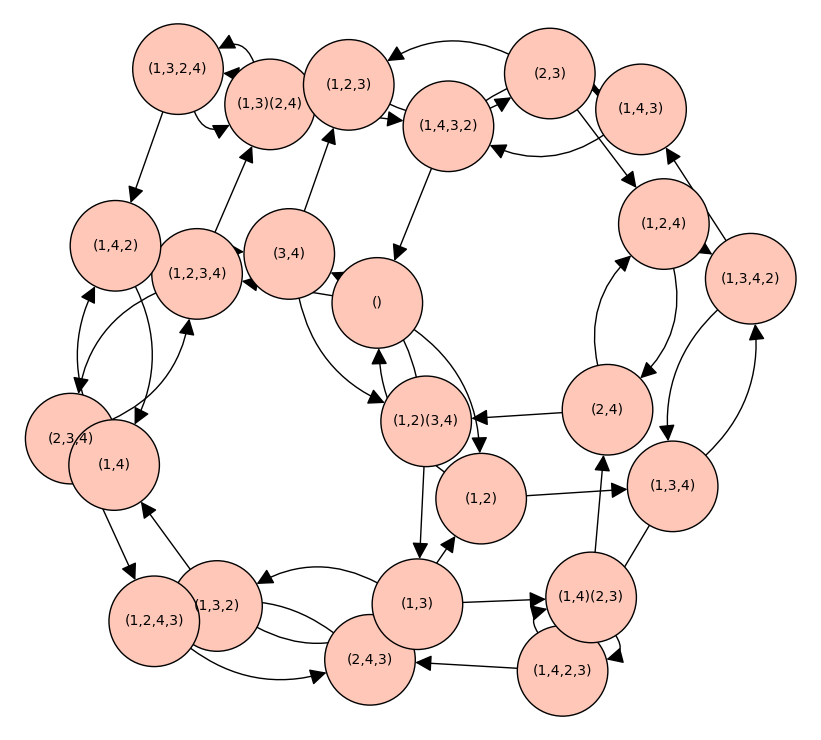

In [290]:

G4 = SymmetricGroup(4)
gens_4 = [gen for gen in G4.gens()]  # Transposition, 4-cycle
plot_cayley_graph(G4, gens_4, "S_4")



G = A_4
Generators: [(1,2,3), (2,3,4)]


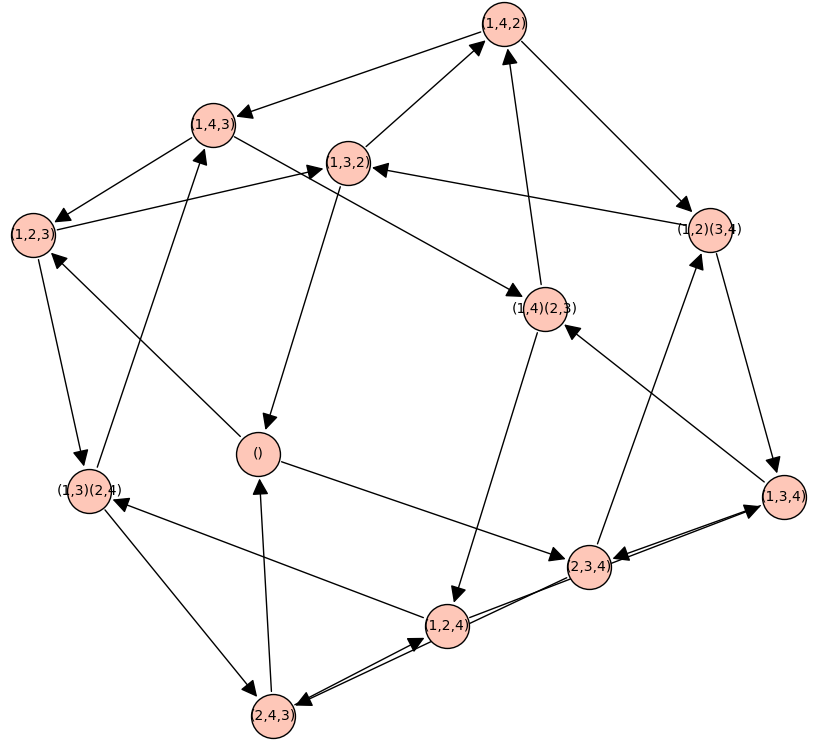

In [291]:

G5 = AlternatingGroup(4)
gens_5 = [gen for gen in G5.gens()] 
plot_cayley_graph(G5, gens_5, "A_4")

---
### 6*. Група підстановок, породжена випадковими підстановками

1. Створіть групи $S_n$ та $A_n$ для великого числа $n$.
2. Проведіть наступний експеримент багато разів (в циклі):<br>
       2.1. Згенеруйте дві випадкові підстановки в $S_n$.<br>
       2.2. Перевірте, парні вони чи ні.<br>
       2.3. Перевірте, чи породжують вони всю групу $S_n$ або її підгрупу $A_n$. 
4. Сформулюйте гіпотезу про те, яка ймовірність породження симетричної групи двома підстановками та що відбувається при $n\rightarrow\infty$.

In [292]:
# Ваш код тут:

---
### 7*. Чи є граф Петерсена графом Келі?

1. Побудуйте граф Петерсена.
2. Перевірте, чи є граф Петерсена графом Келі деякої групи.

In [293]:
# Ваш код тут: